In [1]:
import pandas as pd

In [2]:
df= pd.read_excel("/content/Investor_Lead_Conversion_Clean_500.xlsx")

In [3]:
df

,Investor_ID,City_Tier,Age,Profession,Available_Investment(₹L),Industry_Preference,Risk_Appetite,Past_Business_Experience,Timeline_to_Invest(months),Engagement_Level,Converted(Target)
0,1,3,28,Other,29,Healthcare,High,Yes,4,High,1
1,2,1,37,Lawyer,84,Healthcare,High,Yes,5,High,1
2,3,1,52,Doctor,37,F&B,High,Yes,2,Low,1
3,4,3,26,Salaried,91,F&B,Low,Yes,3,Medium,1
4,5,2,52,Lawyer,97,Retail,Low,Yes,6,Medium,0
...,...,...,...,...,...,...,...,...,...,...,...
495,496,3,32,Business,12,Healthcare,High,No,6,High,1
496,497,1,49,Self-Employed,50,Fashion,High,Yes,4,High,1
497,498,2,39,Doctor,69,PG,Medium,Yes,5,Medium,0
498,499,1,43,Business,14,Retail,Low,No,10,High,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Investor_ID                 500 non-null    int64 
 1   City_Tier                   500 non-null    int64 
 2   Age                         500 non-null    int64 
 3   Profession                  500 non-null    object
 4   Available_Investment(₹L)    500 non-null    int64 
 5   Industry_Preference         500 non-null    object
 6   Risk_Appetite               500 non-null    object
 7   Past_Business_Experience    500 non-null    object
 8   Timeline_to_Invest(months)  500 non-null    int64 
 9   Engagement_Level            500 non-null    object
 10  Converted(Target)           500 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 43.1+ KB


In [5]:
df.describe()

,Investor_ID,City_Tier,Age,Available_Investment(₹L),Timeline_to_Invest(months),Converted(Target)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,1.970000,40.780000,52.974000,6.486000,0.450000
std,144.481833,0.845298,8.815158,27.879236,3.527988,0.497992
min,1.000000,1.000000,25.000000,5.000000,1.000000,0.000000
25%,125.750000,1.000000,33.000000,27.000000,3.000000,0.000000
50%,250.500000,2.000000,41.000000,53.000000,6.000000,0.000000
75%,375.250000,3.000000,49.000000,78.000000,10.000000,1.000000
max,500.000000,3.000000,55.000000,100.000000,12.000000,1.000000


In [6]:
df.head()

,Investor_ID,City_Tier,Age,Profession,Available_Investment(₹L),Industry_Preference,Risk_Appetite,Past_Business_Experience,Timeline_to_Invest(months),Engagement_Level,Converted(Target)
0,1,3,28,Other,29,Healthcare,High,Yes,4,High,1
1,2,1,37,Lawyer,84,Healthcare,High,Yes,5,High,1
2,3,1,52,Doctor,37,F&B,High,Yes,2,Low,1
3,4,3,26,Salaried,91,F&B,Low,Yes,3,Medium,1
4,5,2,52,Lawyer,97,Retail,Low,Yes,6,Medium,0


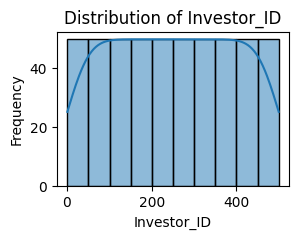

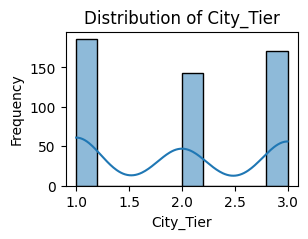

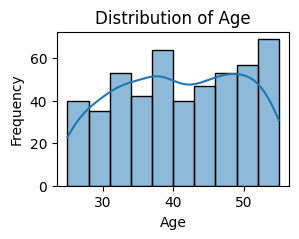

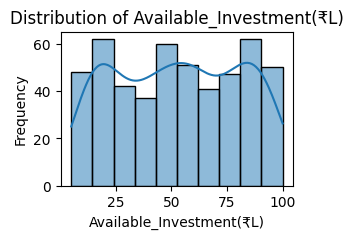

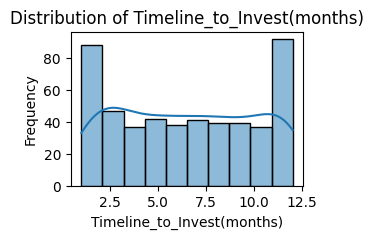

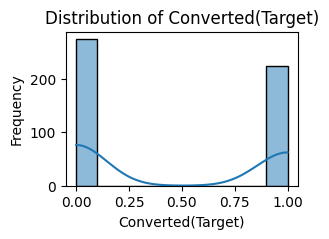

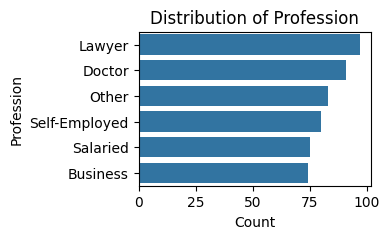

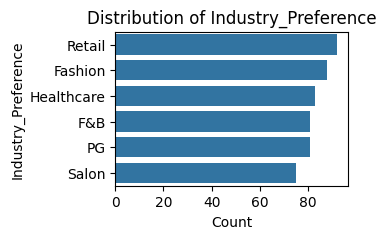

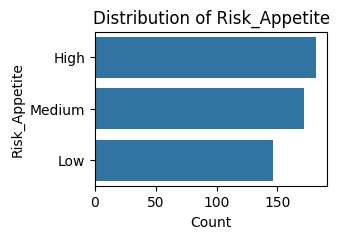

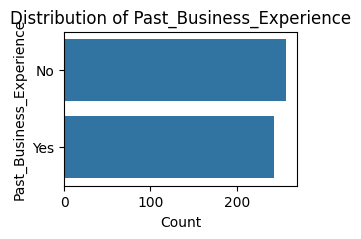

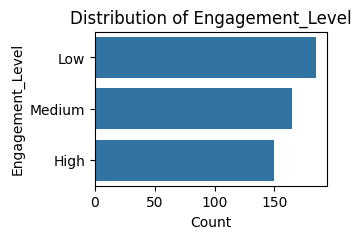

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Count plots for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(3, 2))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

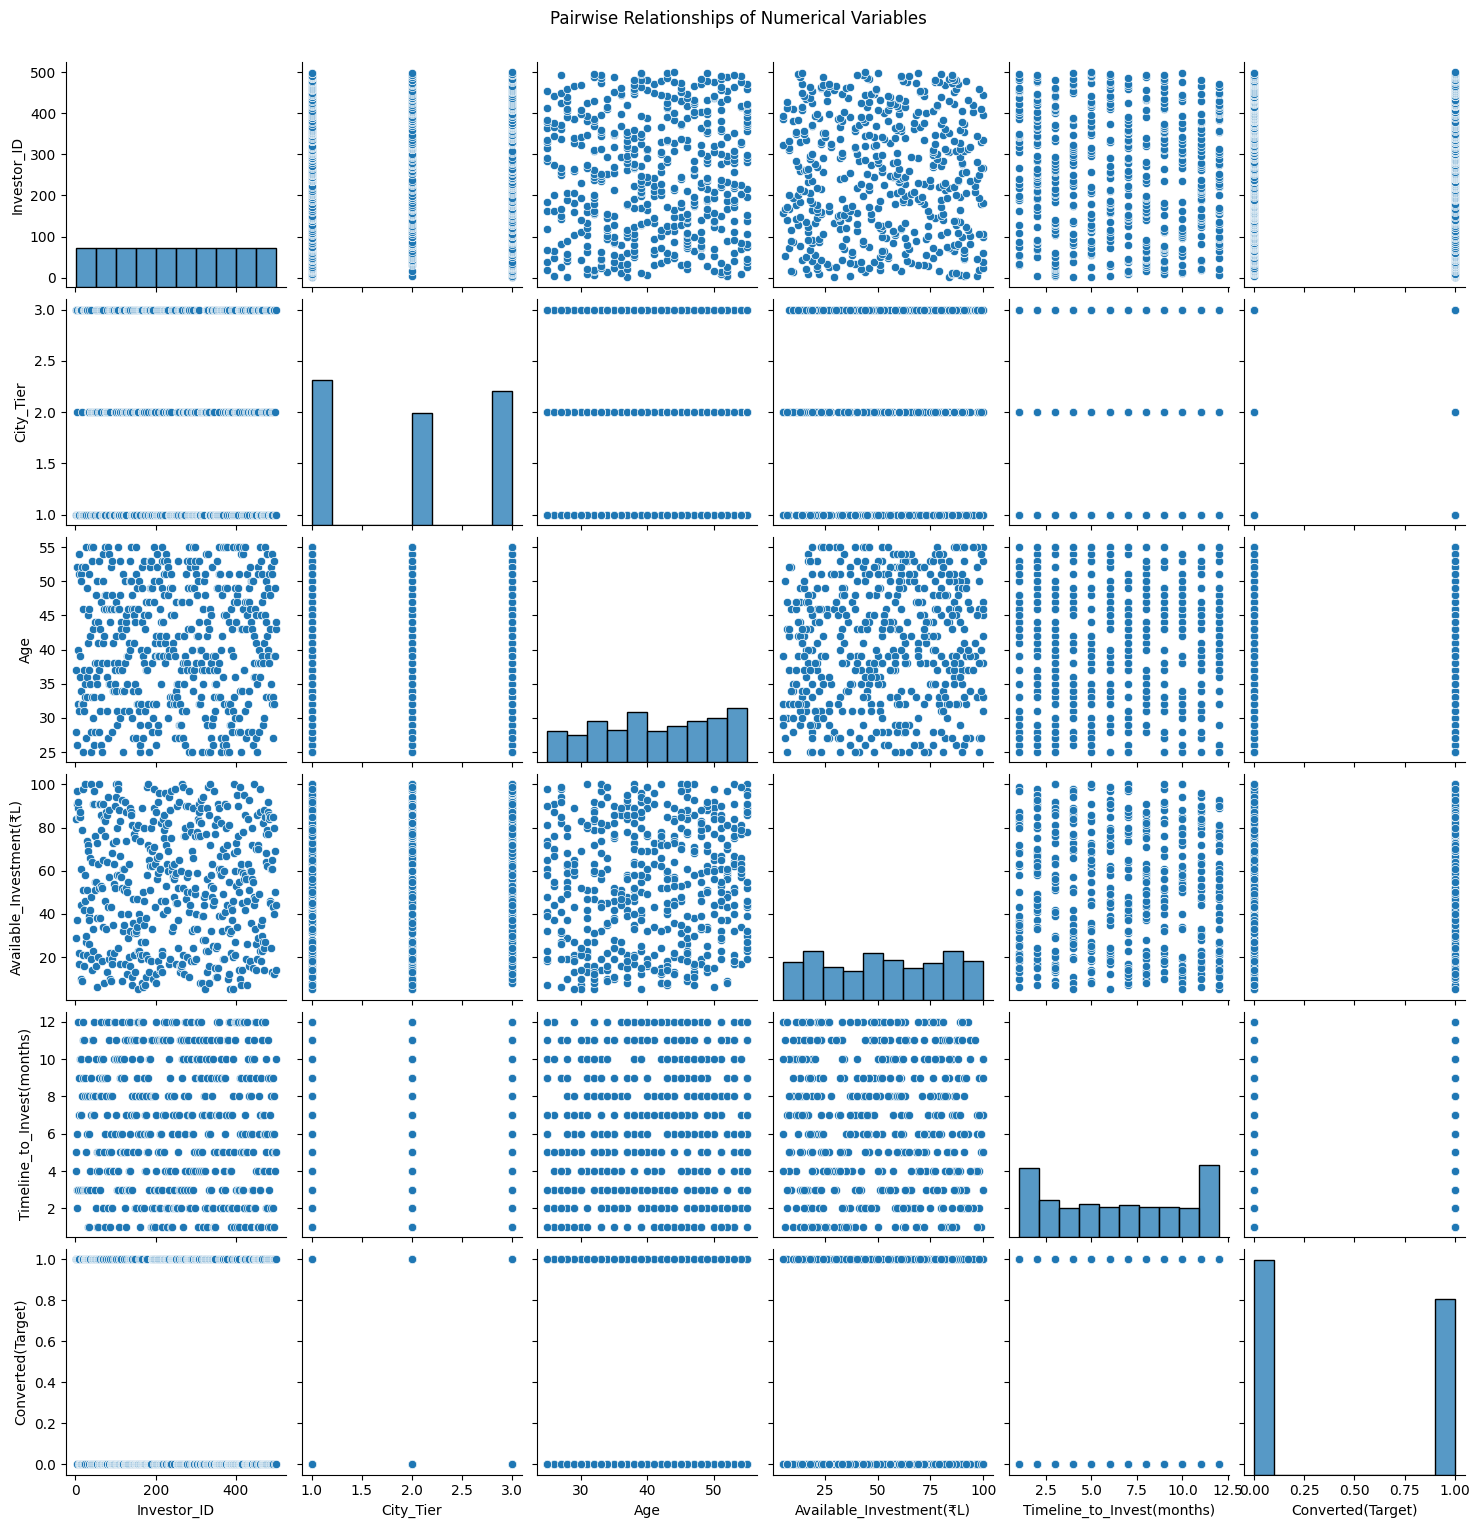

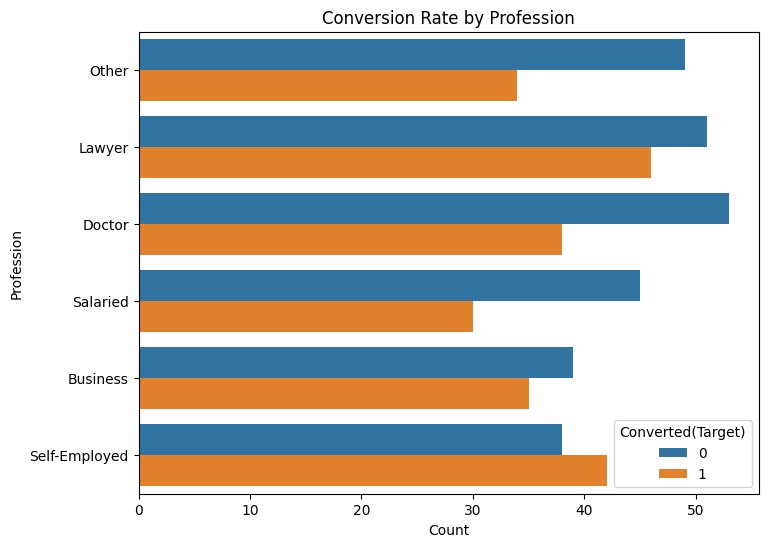

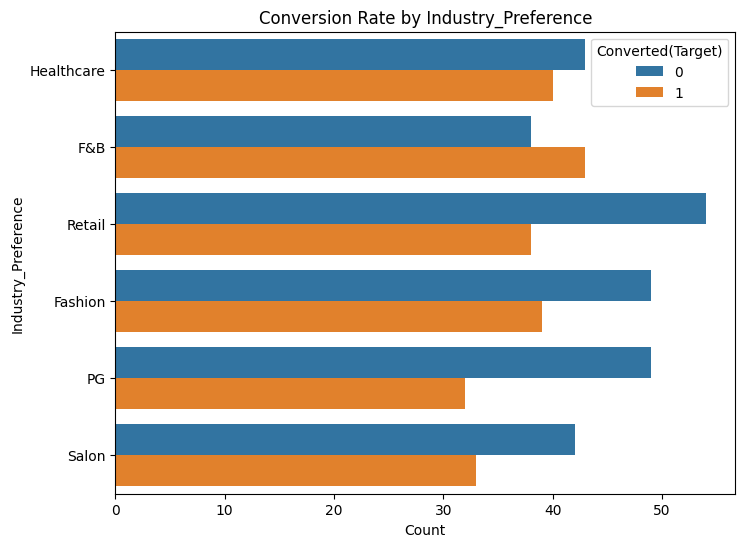

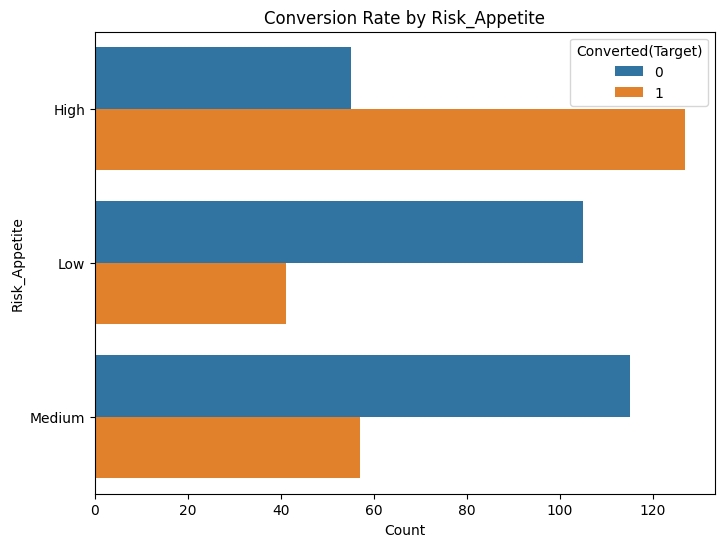

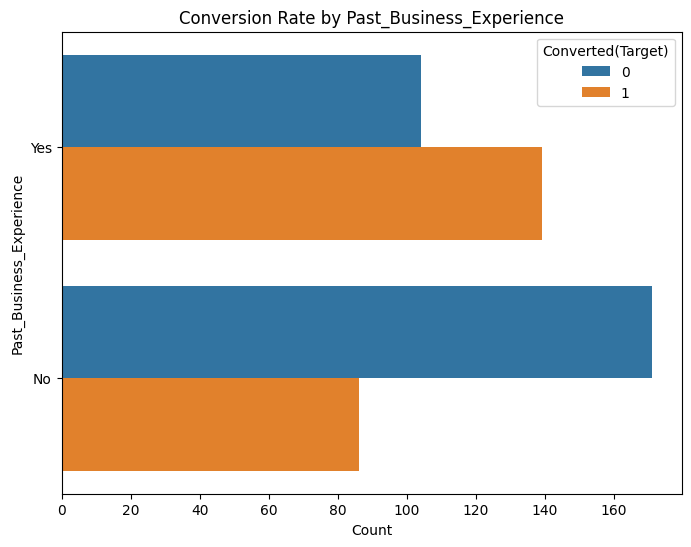

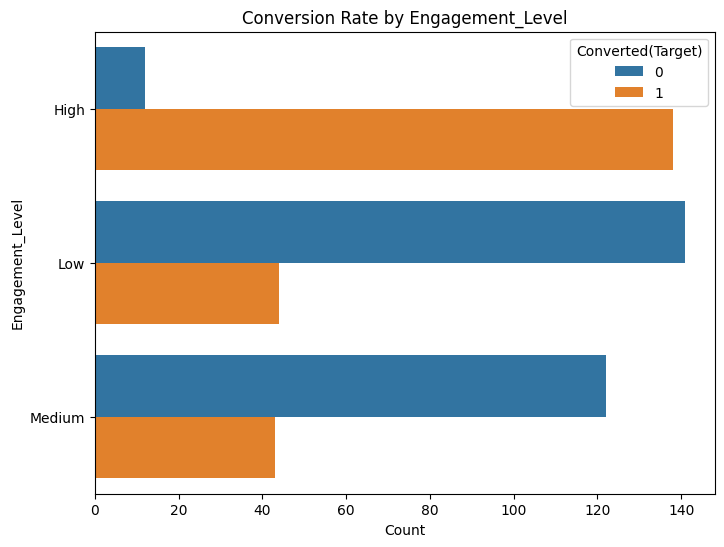

In [15]:
# Pair plot for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairwise Relationships of Numerical Variables', y=1.02)
plt.show()

# Grouped bar plots for categorical columns against the target variable
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, y=col, hue='Converted(Target)')
    plt.title(f'Conversion Rate by {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

# Task
Perform feature engineering on the dataset.

## Feature creation

### Subtask:
Create new features from existing columns that might be more informative for the model.


**Reasoning**:
Create new features based on the instructions.



In [16]:
df['Investment_per_Month'] = df['Available_Investment(₹L)'] / df['Timeline_to_Invest(months)']
df['Is_Doctor_or_Lawyer'] = df['Profession'].apply(lambda x: 1 if x in ['Doctor', 'Lawyer'] else 0)
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 35, 50, 60], labels=['Young', 'Middle-aged', 'Senior'])
df.head()

,Investor_ID,City_Tier,Age,Profession,Available_Investment(₹L),Industry_Preference,Risk_Appetite,Past_Business_Experience,Timeline_to_Invest(months),Engagement_Level,Converted(Target),Investment_per_Month,Is_Doctor_or_Lawyer,Age_Group
0,1,3,28,Other,29,Healthcare,High,Yes,4,High,1,7.250000,0,Young
1,2,1,37,Lawyer,84,Healthcare,High,Yes,5,High,1,16.800000,1,Middle-aged
2,3,1,52,Doctor,37,F&B,High,Yes,2,Low,1,18.500000,1,Senior
3,4,3,26,Salaried,91,F&B,Low,Yes,3,Medium,1,30.333333,0,Young
4,5,2,52,Lawyer,97,Retail,Low,Yes,6,Medium,0,16.166667,1,Senior


## Feature transformation

### Subtask:
Apply transformations to numerical features to handle skewed distributions or outliers.


**Reasoning**:
Examine the distributions of numerical columns from the previously generated histograms to identify columns that are skewed and might benefit from transformation. Based on the previous outputs, 'Available_Investment(₹L)' and 'Timeline_to_Invest(months)' show some skewness. Apply log transformation to 'Available_Investment(₹L)' and 'Timeline_to_Invest(months)' as they appear to be right-skewed. Create new columns for the transformed data and visualize their distributions.



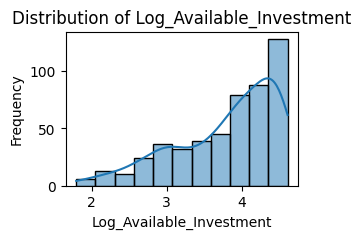

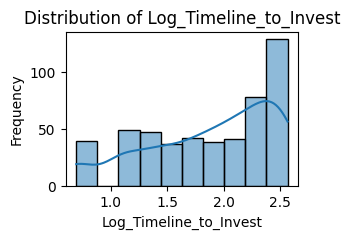

In [17]:
import numpy as np

# Apply log transformation to 'Available_Investment(₹L)' and 'Timeline_to_Invest(months)'
df['Log_Available_Investment'] = np.log1p(df['Available_Investment(₹L)'])
df['Log_Timeline_to_Invest'] = np.log1p(df['Timeline_to_Invest(months)'])

# Visualize the distributions of the transformed columns
transformed_cols = ['Log_Available_Investment', 'Log_Timeline_to_Invest']
for col in transformed_cols:
    plt.figure(figsize=(3, 2))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Encoding categorical features

### Subtask:
Convert categorical features into a numerical format that can be used by machine learning models.


**Reasoning**:
Identify categorical columns, apply one-hot encoding, drop original categorical columns, and display the head of the dataframe.



In [18]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df.head())

,Investor_ID,City_Tier,Age,Available_Investment(₹L),Timeline_to_Invest(months),Converted(Target),Investment_per_Month,Is_Doctor_or_Lawyer,Log_Available_Investment,Log_Timeline_to_Invest,...,Industry_Preference_PG,Industry_Preference_Retail,Industry_Preference_Salon,Risk_Appetite_Low,Risk_Appetite_Medium,Past_Business_Experience_Yes,Engagement_Level_Low,Engagement_Level_Medium,Age_Group_Middle-aged,Age_Group_Senior
0,1,3,28,29,4,1,7.250000,0,3.401197,1.609438,...,False,False,False,False,False,True,False,False,False,False
1,2,1,37,84,5,1,16.800000,1,4.442651,1.791759,...,False,False,False,False,False,True,False,False,True,False
2,3,1,52,37,2,1,18.500000,1,3.637586,1.098612,...,False,False,False,False,False,True,True,False,False,True
3,4,3,26,91,3,1,30.333333,0,4.521789,1.386294,...,False,False,False,True,False,True,False,True,False,False
4,5,2,52,97,6,0,16.166667,1,4.584967,1.945910,...,False,True,False,True,False,True,False,True,False,True


## Feature scaling

### Subtask:
Scale numerical features to a similar range to prevent some features from dominating others.


**Reasoning**:
Identify numerical columns, instantiate StandardScaler, fit and transform the selected columns, and create a new DataFrame with the scaled features.



In [19]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding Investor_ID and Converted(Target))
numerical_cols_to_scale = ['City_Tier', 'Age', 'Available_Investment(₹L)', 'Timeline_to_Invest(months)',
                           'Investment_per_Month', 'Log_Available_Investment', 'Log_Timeline_to_Invest']

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
df_scaled = df.copy() # Create a copy to avoid modifying the original df directly before checking the output
df_scaled[numerical_cols_to_scale] = scaler.fit_transform(df_scaled[numerical_cols_to_scale])

# Display the first few rows of the DataFrame with scaled features
display(df_scaled.head())

,Investor_ID,City_Tier,Age,Available_Investment(₹L),Timeline_to_Invest(months),Converted(Target),Investment_per_Month,Is_Doctor_or_Lawyer,Log_Available_Investment,Log_Timeline_to_Invest,...,Industry_Preference_PG,Industry_Preference_Retail,Industry_Preference_Salon,Risk_Appetite_Low,Risk_Appetite_Medium,Past_Business_Experience_Yes,Engagement_Level_Low,Engagement_Level_Medium,Age_Group_Middle-aged,Age_Group_Senior
0,1,1.219725,-1.451227,-0.860784,-0.705357,1,-0.398908,0,-0.585046,-0.465666,...,False,False,False,False,False,True,False,False,False,False
1,2,-1.148673,-0.429236,1.113986,-0.421625,1,0.174070,1,0.940944,-0.143814,...,False,False,False,False,False,True,False,False,True,False
2,3,-1.148673,1.274082,-0.573545,-1.272820,1,0.276067,1,-0.238677,-1.367425,...,False,False,False,False,False,True,True,False,False,True
3,4,1.219725,-1.678337,1.365320,-0.989088,1,0.986040,0,1.056900,-0.859581,...,False,False,False,True,False,True,False,True,False,False
4,5,0.035526,1.274082,1.580750,-0.137894,0,0.136072,1,1.149473,0.128307,...,False,True,False,True,False,True,False,True,False,True


## Feature selection

### Subtask:
Select the most relevant features for the model to reduce dimensionality and improve performance.


**Reasoning**:
Separate features and target, then use SelectKBest to select the top features.



In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_scaled.drop('Converted(Target)', axis=1)
y = df_scaled['Converted(Target)']

# Select top 15 features
k_best_features = SelectKBest(score_func=f_classif, k=15)
fit = k_best_features.fit(X, y)

# Get the names of the selected features
selected_feature_indices = fit.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Create a new DataFrame with selected features
X_selected = X[selected_feature_names]

display(X_selected.head())
print(f"Selected features: {selected_feature_names.tolist()}")

,Age,Available_Investment(₹L),Timeline_to_Invest(months),Investment_per_Month,Log_Available_Investment,Log_Timeline_to_Invest,Profession_Salaried,Profession_Self-Employed,Industry_Preference_PG,Risk_Appetite_Low,Risk_Appetite_Medium,Past_Business_Experience_Yes,Engagement_Level_Low,Engagement_Level_Medium,Age_Group_Senior
0,-1.451227,-0.860784,-0.705357,-0.398908,-0.585046,-0.465666,False,False,False,False,False,True,False,False,False
1,-0.429236,1.113986,-0.421625,0.174070,0.940944,-0.143814,False,False,False,False,False,True,False,False,False
2,1.274082,-0.573545,-1.272820,0.276067,-0.238677,-1.367425,False,False,False,False,False,True,True,False,True
3,-1.678337,1.365320,-0.989088,0.986040,1.056900,-0.859581,True,False,False,True,False,True,False,True,False
4,1.274082,1.580750,-0.137894,0.136072,1.149473,0.128307,False,False,False,True,False,True,False,True,True


Selected features: ['Age', 'Available_Investment(₹L)', 'Timeline_to_Invest(months)', 'Investment_per_Month', 'Log_Available_Investment', 'Log_Timeline_to_Invest', 'Profession_Salaried', 'Profession_Self-Employed', 'Industry_Preference_PG', 'Risk_Appetite_Low', 'Risk_Appetite_Medium', 'Past_Business_Experience_Yes', 'Engagement_Level_Low', 'Engagement_Level_Medium', 'Age_Group_Senior']


## Summary:

### Data Analysis Key Findings

*   Three new features were created: `Investment_per_Month` (calculated from `Available_Investment(₹L)` and `Timeline_to_Invest(months)`), `Is_Doctor_or_Lawyer` (a binary indicator for profession), and `Age_Group` (categorizing age into 'Young', 'Middle-aged', and 'Senior').
*   The features `Available_Investment(₹L)` and `Timeline_to_Invest(months)` were identified as having right skewness and were successfully transformed using the log1p function, resulting in `Log_Available_Investment` and `Log_Timeline_to_Invest` with more symmetric distributions.
*   Categorical features were successfully converted into numerical format using one-hot encoding with `drop_first=True`.
*   Selected numerical features (`City_Tier`, `Age`, `Available_Investment(₹L)`, `Timeline_to_Invest(months)`, `Investment_per_Month`, `Log_Available_Investment`, `Log_Timeline_to_Invest`) were successfully scaled using `StandardScaler`.
*   The top 15 most relevant features were selected using `SelectKBest` with the `f_classif` scoring function.

### Insights or Next Steps

*   The feature engineering steps have prepared the data for machine learning model training by creating potentially useful new features, handling skewed distributions, encoding categorical variables, scaling numerical features, and selecting a subset of the most relevant features.
*   The next step is to use the `X_selected` DataFrame (containing the top 15 features) and the target variable `y` to train a machine learning model.


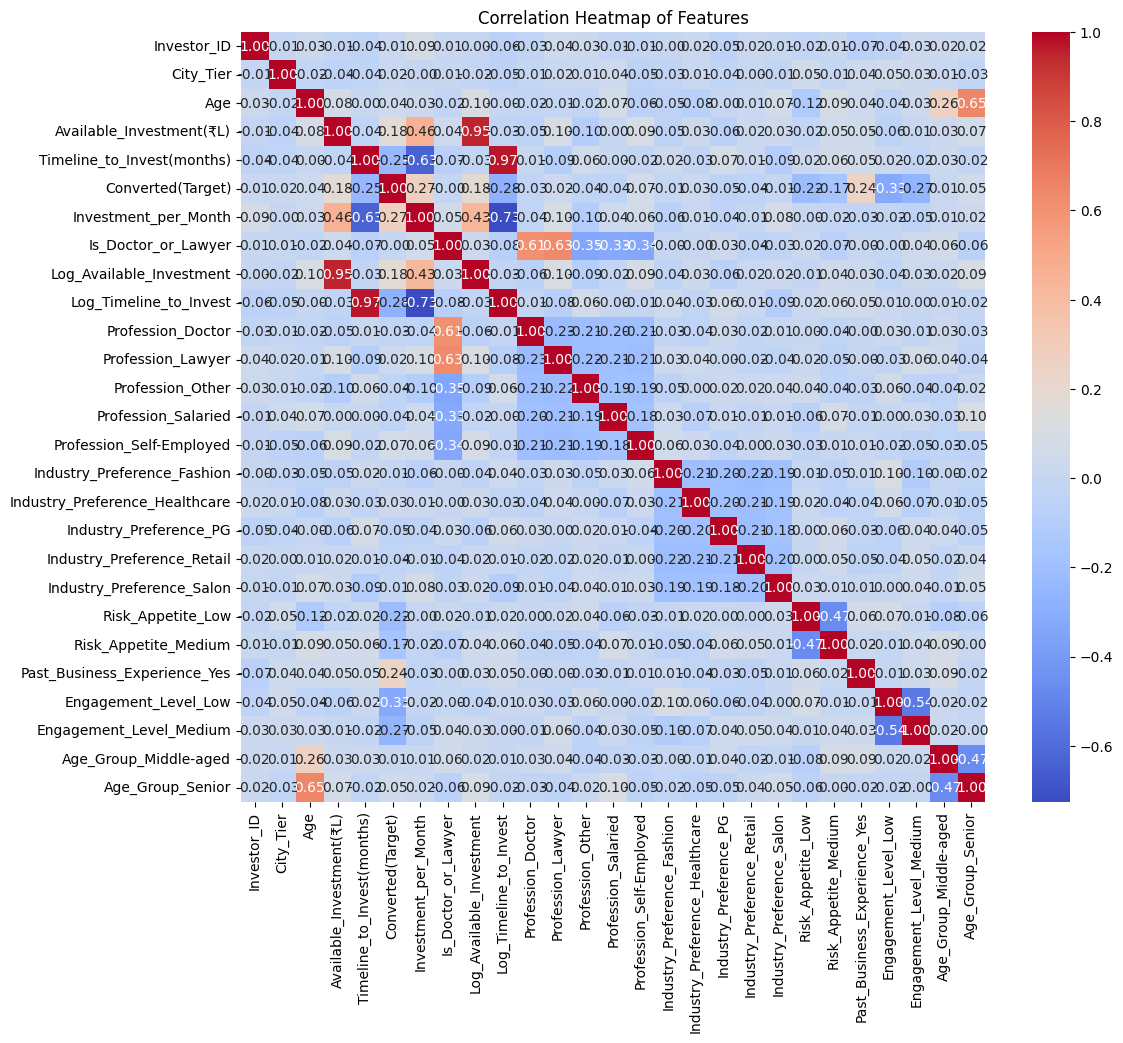

In [21]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (400, 15)
Testing set shape: (100, 15)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.94      0.97        49

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100


Confusion Matrix:
[[51  0]
 [ 3 46]]


In [24]:
# Get the intercept and coefficients
intercept = model.intercept_[0]
coefficients = model.coef_[0]

# Get the names of the features used in the model
feature_names = X_selected.columns

# Print the logistic equation
print(f"Logistic Regression Equation:")
print(f"log(p/(1-p)) = {intercept:.4f}", end="")
for i, coef in enumerate(coefficients):
    print(f" + ({coef:.4f} * {feature_names[i]})", end="")
print()

Logistic Regression Equation:
log(p/(1-p)) = 3.4753 + (0.0628 * Age) + (-0.6429 * Available_Investment(₹L)) + (0.7701 * Timeline_to_Invest(months)) + (0.0250 * Investment_per_Month) + (1.3946 * Log_Available_Investment) + (-1.8515 * Log_Timeline_to_Invest) + (-0.0835 * Profession_Salaried) + (-0.2536 * Profession_Self-Employed) + (0.0251 * Industry_Preference_PG) + (-2.5986 * Risk_Appetite_Low) + (-2.5359 * Risk_Appetite_Medium) + (2.3404 * Past_Business_Experience_Yes) + (-4.4914 * Engagement_Level_Low) + (-4.3562 * Engagement_Level_Medium) + (-0.2193 * Age_Group_Senior)


In [25]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Display the predictions
print("Predictions on the test set:")
print(y_pred)

Predictions on the test set:
[1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1
 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0]


In [26]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_selected, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation scores: [0.96 0.96 0.97 0.97 0.96]
Mean cross-validation accuracy: 0.9639999999999999


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Perform 5-fold cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_selected, y, cv=5)

print("\nRandom Forest Cross-validation scores:", cv_scores_rf)
print("Random Forest Mean cross-validation accuracy:", cv_scores_rf.mean())

# Compare with Logistic Regression results
print("\n--- Comparison with Logistic Regression ---")
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print(f"Logistic Regression Mean cross-validation accuracy: {cv_scores.mean():.2f}")

Random Forest Accuracy: 0.94

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        51
           1       0.96      0.92      0.94        49

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Random Forest Confusion Matrix:
[[49  2]
 [ 4 45]]

Random Forest Cross-validation scores: [0.91 0.9  0.91 0.87 0.86]
Random Forest Mean cross-validation accuracy: 0.89

--- Comparison with Logistic Regression ---
Logistic Regression Accuracy: 0.97
Logistic Regression Mean cross-validation accuracy: 0.96


In [65]:
import joblib

# Save the trained Logistic Regression model to a file
filename = 'logistic_regression_model.pkl'
joblib.dump(model, filename)

print(f"Trained model saved to {filename}")

Trained model saved to logistic_regression_model.pkl


In [48]:
df1= pd.read_excel("/content/New_Investor_Leads_for_Prediction.xlsx")

In [50]:
df1.describe()

,Investor_ID,City_Tier,Age,Available_Investment(₹L),Timeline_to_Invest(months)
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,1010.50000,2.100000,43.450000,48.100000,6.950000
std,5.91608,0.852242,7.674119,26.355665,3.790223
min,1001.00000,1.000000,32.000000,7.000000,1.000000
25%,1005.75000,1.000000,37.750000,29.000000,3.000000
50%,1010.50000,2.000000,43.000000,45.000000,9.000000
75%,1015.25000,3.000000,50.000000,64.500000,9.500000
max,1020.00000,3.000000,55.000000,96.000000,12.000000


In [51]:
df1.head()

,Investor_ID,City_Tier,Age,Profession,Available_Investment(₹L),Industry_Preference,Risk_Appetite,Past_Business_Experience,Timeline_to_Invest(months),Engagement_Level
0,1001,1,46,Doctor,19,F&B,Medium,Yes,4,Medium
1,1002,1,43,Salaried,18,Salon,Medium,Yes,11,Medium
2,1003,2,45,Salaried,20,Healthcare,High,No,2,High
3,1004,3,37,Doctor,58,F&B,Medium,No,5,Medium
4,1005,3,38,Business,91,Retail,Medium,Yes,12,Medium


In [52]:
# Identify categorical columns in the new leads data
categorical_cols_new = ['Profession', 'Industry_Preference', 'Risk_Appetite', 'Past_Business_Experience', 'Engagement_Level']

# Apply one-hot encoding to categorical features
new_leads_df_encoded = pd.get_dummies(df1.copy(), columns=categorical_cols_new, drop_first=True)

# Display the head of the DataFrame with encoded features
display(new_leads_df_encoded.head())

,Investor_ID,City_Tier,Age,Available_Investment(₹L),Timeline_to_Invest(months),Profession_Doctor,Profession_Lawyer,Profession_Other,Profession_Salaried,Profession_Self-Employed,Industry_Preference_Fashion,Industry_Preference_Healthcare,Industry_Preference_Retail,Industry_Preference_Salon,Risk_Appetite_Low,Risk_Appetite_Medium,Past_Business_Experience_Yes,Engagement_Level_Low,Engagement_Level_Medium
0,1001,1,46,19,4,True,False,False,False,False,False,False,False,False,False,True,True,False,True
1,1002,1,43,18,11,False,False,False,True,False,False,False,False,True,False,True,True,False,True
2,1003,2,45,20,2,False,False,False,True,False,False,True,False,False,False,False,False,False,False
3,1004,3,37,58,5,True,False,False,False,False,False,False,False,False,False,True,False,False,True
4,1005,3,38,91,12,False,False,False,False,False,False,False,True,False,False,True,True,False,True


In [57]:
# Load the new leads data
new_leads_df = pd.read_excel("/content/New_Investor_Leads_for_Prediction.xlsx")

# Apply the same feature engineering steps as the training data
new_leads_df['Investment_per_Month'] = new_leads_df['Available_Investment(₹L)'] / new_leads_df['Timeline_to_Invest(months)']
new_leads_df['Is_Doctor_or_Lawyer'] = new_leads_df['Profession'].apply(lambda x: 1 if x in ['Doctor', 'Lawyer'] else 0)
new_leads_df['Age_Group'] = pd.cut(new_leads_df['Age'], bins=[20, 35, 50, 60], labels=['Young', 'Middle-aged', 'Senior'])

# Apply the same feature transformation (log1p) to the relevant columns
new_leads_df['Log_Available_Investment'] = np.log1p(new_leads_df['Available_Investment(₹L)'])
new_leads_df['Log_Timeline_to_Invest'] = np.log1p(new_leads_df['Timeline_to_Invest(months)'])



Scaler expects these numeric feature names:
 ['City_Tier', 'Age', 'Available_Investment(₹L)', 'Timeline_to_Invest(months)', 'Investment_per_Month', 'Log_Available_Investment', 'Log_Timeline_to_Invest']

New leads columns (sample): ['Investor_ID', 'City_Tier', 'Age', 'Profession', 'Available_Investment(₹L)', 'Industry_Preference', 'Risk_Appetite', 'Past_Business_Experience', 'Timeline_to_Invest(months)', 'Engagement_Level']

Missing numeric columns required by scaler: []
Scaling complete.


In [64]:
# Load the new leads data
new_leads_df = pd.read_excel("/content/New_Investor_Leads_for_Prediction.xlsx")

# Apply the same feature engineering steps as the training data
new_leads_df['Investment_per_Month'] = new_leads_df['Available_Investment(₹L)'] / new_leads_df['Timeline_to_Invest(months)']
new_leads_df['Is_Doctor_or_Lawyer'] = new_leads_df['Profession'].apply(lambda x: 1 if x in ['Doctor', 'Lawyer'] else 0)
new_leads_df['Age_Group'] = pd.cut(new_leads_df['Age'], bins=[20, 35, 50, 60], labels=['Young', 'Middle-aged', 'Senior'])

# Apply the same feature transformation (log1p) to the relevant columns
new_leads_df['Log_Available_Investment'] = np.log1p(new_leads_df['Available_Investment(₹L)'])
new_leads_df['Log_Timeline_to_Invest'] = np.log1p(new_leads_df['Timeline_to_Invest(months)'])

# Display the head of the DataFrame with engineered features
display(new_leads_df.head())

,Investor_ID,City_Tier,Age,Profession,Available_Investment(₹L),Industry_Preference,Risk_Appetite,Past_Business_Experience,Timeline_to_Invest(months),Engagement_Level,Investment_per_Month,Is_Doctor_or_Lawyer,Age_Group,Log_Available_Investment,Log_Timeline_to_Invest
0,1001,1,46,Doctor,19,F&B,Medium,Yes,4,Medium,4.750000,1,Middle-aged,2.995732,1.609438
1,1002,1,43,Salaried,18,Salon,Medium,Yes,11,Medium,1.636364,0,Middle-aged,2.944439,2.484907
2,1003,2,45,Salaried,20,Healthcare,High,No,2,High,10.000000,0,Middle-aged,3.044522,1.098612
3,1004,3,37,Doctor,58,F&B,Medium,No,5,Medium,11.600000,1,Middle-aged,4.077537,1.791759
4,1005,3,38,Business,91,Retail,Medium,Yes,12,Medium,7.583333,0,Middle-aged,4.521789,2.564949


In [66]:
# Identify categorical columns in the new leads data that need encoding
categorical_cols_new = ['Profession', 'Industry_Preference', 'Risk_Appetite', 'Past_Business_Experience', 'Engagement_Level', 'Age_Group']

# Apply one-hot encoding to categorical features
new_leads_df_encoded = pd.get_dummies(new_leads_df.copy(), columns=categorical_cols_new, drop_first=True)

# Display the head of the DataFrame with encoded features
display(new_leads_df_encoded.head())

,Investor_ID,City_Tier,Age,Available_Investment(₹L),Timeline_to_Invest(months),Investment_per_Month,Is_Doctor_or_Lawyer,Log_Available_Investment,Log_Timeline_to_Invest,Profession_Doctor,...,Industry_Preference_Healthcare,Industry_Preference_Retail,Industry_Preference_Salon,Risk_Appetite_Low,Risk_Appetite_Medium,Past_Business_Experience_Yes,Engagement_Level_Low,Engagement_Level_Medium,Age_Group_Middle-aged,Age_Group_Senior
0,1001,1,46,19,4,4.750000,1,2.995732,1.609438,True,...,False,False,False,False,True,True,False,True,True,False
1,1002,1,43,18,11,1.636364,0,2.944439,2.484907,False,...,False,False,True,False,True,True,False,True,True,False
2,1003,2,45,20,2,10.000000,0,3.044522,1.098612,False,...,True,False,False,False,False,False,False,False,True,False
3,1004,3,37,58,5,11.600000,1,4.077537,1.791759,True,...,False,False,False,False,True,False,False,True,True,False
4,1005,3,38,91,12,7.583333,0,4.521789,2.564949,False,...,False,True,False,False,True,True,False,True,True,False


In [69]:
# Identify numerical columns in X_selected that were originally scaled AND are still numerical in the new_leads_df_encoded
# These are the columns that should be scaled in the new leads data using the fitted scaler.
# Ensure these columns are present in the new_leads_df_encoded and are numerical.
scaled_cols_for_transform_new_leads = [col for col in numerical_cols_to_scale if col in X_selected.columns and col in new_leads_df_encoded.columns and new_leads_df_encoded[col].dtype in ['int64', 'float64']]

# Create a copy to avoid modifying the original encoded dataframe directly before checking the output
new_leads_df_scaled = new_leads_df_encoded.copy()

# Use the same scaler fitted on the training data to transform the numerical columns in the new leads data
new_leads_df_scaled[scaled_cols_for_transform_new_leads] = scaler.transform(new_leads_df_scaled[scaled_cols_for_transform_new_leads])

# Display the head of the DataFrame with scaled numerical features
display(new_leads_df_scaled.head())

/tmp/ipython-input-1759794109.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_leads_df_scaled[expected_cols] = scaler.transform(new_leads_df_scaled[expected_cols])


In [70]:
# Ensure that the new leads dataframe has the same columns as the training data (X_selected)
# Create a copy to avoid modifying the original DataFrame in place
new_leads_df_aligned = new_leads_df_encoded.copy()

# Add missing columns with default value 0 (for one-hot encoded columns not present in new data)
missing_cols = set(X_selected.columns) - set(new_leads_df_aligned.columns)
for c in missing_cols:
    new_leads_df_aligned[c] = 0
# Reindex the columns to match the order of the training data
new_leads_df_aligned = new_leads_df_aligned[X_selected.columns]

# Display the head of the DataFrame with columns aligned to X_selected
display(new_leads_df_aligned.head())

,Age,Available_Investment(₹L),Timeline_to_Invest(months),Investment_per_Month,Log_Available_Investment,Log_Timeline_to_Invest,Profession_Salaried,Profession_Self-Employed,Industry_Preference_PG,Risk_Appetite_Low,Risk_Appetite_Medium,Past_Business_Experience_Yes,Engagement_Level_Low,Engagement_Level_Medium,Age_Group_Senior
0,46,19,4,4.750000,2.995732,1.609438,False,False,0,False,True,True,False,True,False
1,43,18,11,1.636364,2.944439,2.484907,True,False,0,False,True,True,False,True,False
2,45,20,2,10.000000,3.044522,1.098612,True,False,0,False,False,False,False,False,False
3,37,58,5,11.600000,4.077537,1.791759,False,False,0,False,True,False,False,True,False
4,38,91,12,7.583333,4.521789,2.564949,False,False,0,False,True,True,False,True,False


In [80]:
# Identify the numerical columns in new_leads_df_aligned that were originally scaled
# These are the columns that should be scaled using the fitted scaler.
# Ensure these columns are present and are numerical.
cols_to_scale_in_aligned_new_leads = [col for col in numerical_cols_to_scale if col in X_selected.columns and col in new_leads_df_aligned.columns and new_leads_df_aligned[col].dtype in ['int64', 'float64']]


# Predict probabilities (likelihood of conversion)
new_leads_probabilities = model.predict_proba(new_leads_df_aligned_scaled)[:, 1] # Get the probability of the positive class (1)

# Predict classes (0: Not Converted, 1: Converted)
new_leads_predicted_classes = model.predict(new_leads_df_aligned_scaled)

# Add the predictions back to the original new leads dataset (df1)
df1['Conversion_Probability'] = new_leads_probabilities
df1['Predicted_Converted'] = new_leads_predicted_classes

# Display the original new leads DataFrame with the added predictions
display(df1.head())

,Investor_ID,City_Tier,Age,Profession,Available_Investment(₹L),Industry_Preference,Risk_Appetite,Past_Business_Experience,Timeline_to_Invest(months),Engagement_Level,Predicted_Converted,Conversion_Probability
0,1001,1,46,Doctor,19,F&B,Medium,Yes,4,Medium,0,2.455013e-03
1,1002,1,43,Salaried,18,Salon,Medium,Yes,11,Medium,0,1.175919e-01
2,1003,2,45,Salaried,20,Healthcare,High,No,2,High,0,6.663712e-02
3,1004,3,37,Doctor,58,F&B,Medium,No,5,Medium,0,1.435792e-14
4,1005,3,38,Business,91,Retail,Medium,Yes,12,Medium,0,8.536175e-21


In [73]:
import joblib

# Load the trained model from the file
loaded_model = joblib.load('logistic_regression_model.pkl')

print("Trained model loaded successfully!")

Trained model loaded successfully!


In [83]:
# Ensure new_leads_df, new_leads_df_encoded, and new_leads_df_aligned are available from previous steps
# If not, you might need to re-run the cells for feature engineering, encoding, and alignment.

# Identify the numerical columns in new_leads_df_aligned that were originally scaled
# These are the columns that should be scaled using the fitted scaler.
# Ensure these columns are present and are numerical.
cols_to_scale_in_aligned_new_leads = [col for col in numerical_cols_to_scale if col in X_selected.columns and col in new_leads_df_aligned.columns and new_leads_df_aligned[col].dtype in ['int64', 'float64']]


# Make predictions using the loaded Logistic Regression model
new_leads_predictions = loaded_model.predict(new_leads_df_scaled)

# Display the predictions
print("Predictions for the new leads (0: Not Converted, 1: Converted):")
print(new_leads_predictions)

# Optionally, predict probabilities as well
new_leads_probabilities = loaded_model.predict_proba(new_leads_df_scaled)[:, 1]
print("\nConversion Probabilities for the new leads:")
print(new_leads_probabilities)

# Add predictions and probabilities back to the original new leads dataset (df1)
df1['Predicted_Converted'] = new_leads_predictions
df1['Conversion_Probability'] = new_leads_probabilities

# Display the original new leads DataFrame with the added predictions
display(df1.head())

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- City_Tier
Feature names seen at fit time, yet now missing:
- Age_Group_Senior
- Engagement_Level_Low
- Engagement_Level_Medium
- Industry_Preference_PG
- Past_Business_Experience_Yes
- ...
